In [1]:
# FieldNBalance is a program that estimates the N balance and provides N fertilizer recommendations for cultivated crops.
# Author: Hamish Brown.
# Copyright (c) 2024 The New Zealand Institute for Plant and Food Research Limited

In [2]:
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00',
    'black': '#000000'
} 

Path for current Tests

In [3]:
try: 
    if os.environ["GITHUB_WORKSPACE"] != None:
        root = os.environ["GITHUB_WORKSPACE"]
        inPath = os.path.join(root, "TestComponents", "TestSets", "CropStage", "Outputs")
        outPath = os.path.join(root, "TestGraphs", "Outputs")  
        localDayFirst = False
        localDateFormat = '%m/%d/%Y %H:%M:%S'
except:
    localDayFirst = True
    localDateFormat = '%d/%m/%Y %H:%M:%S %p'
    rootfrags = os.path.abspath('Location.py').split("\\")
    root = ""
    for d in rootfrags:
        if d == "FieldNBalance":
            break
        else:
            root += d + "\\"
    inPath = os.path.join(root,"FieldNBalance","TestComponents", "TestSets", "CropStage", "Outputs")
    outPath = os.path.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [4]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [5]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(os.path.join(inPath, t),index_col=0,dayfirst=localDayFirst,date_format=localDateFormat)  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

Make graph

In [6]:
colors = ['purple','purple','green','green','orange','orange','blue','blue','red','red','black','yellow','yellow']
lines = ['-','--','-','--','-','--','-','--','-','--','-','-','--']

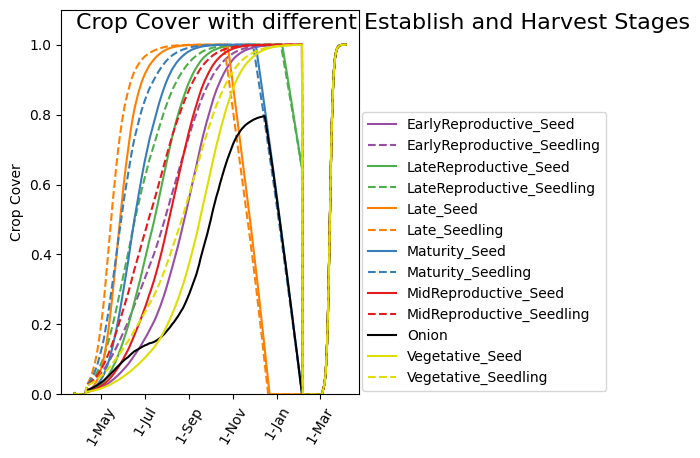

In [7]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'Green cover')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Crop Cover')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.95,"Crop Cover with different Establish and Harvest Stages",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.ylim(0,1.1)
plt.savefig(os.path.join(outPath,'3-CropStage_Cover.png'))

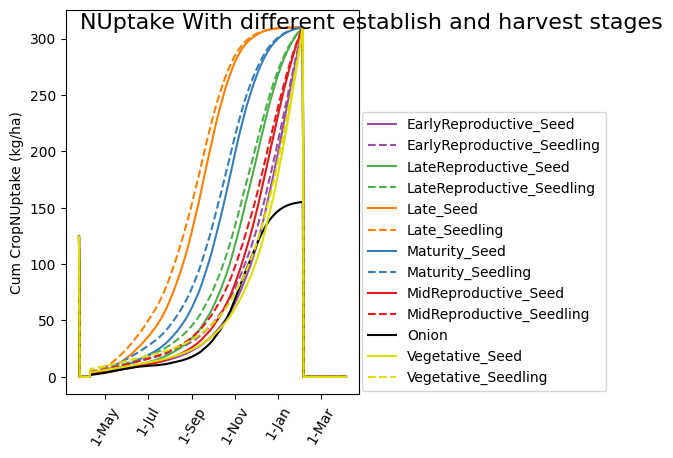

In [8]:
Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'CropN')],lines[pos],color=CBcolors[colors[pos]],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum CropNUptake (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
plt.text(0.05,0.95,"NUptake With different establish and harvest stages",fontsize = 16,transform=ax.transAxes)
Graph.tight_layout(pad=1.5)
plt.savefig(os.path.join(outPath,'3-CropStage_NUptake.png'))